# Homework #6: First Order Methods Cont'd
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 7/2/2020|

## Required Libraries

In [3]:
using LinearAlgebra
using Plots
# plotly()

Plots.PlotlyBackend()

# Momentum

In [4]:
abstract type DescentMethod end

In [38]:
mutable struct Momentum2 <: DescentMethod
    α # learning rate
    β # momentum decay
    v # momentum
    x # current position
end

In [6]:
function init!(M::Momentum, f, ∇f, x)
    M.v = zeros(length(x))
    return M
end

init! (generic function with 1 method)

In [111]:
function step!(M::Momentum2, f, ∇f)
    α, β, v, g = M.α, M.β, M.v, ∇f(M.x)
#     d = -g/norm(g)
#     v[:] = β*v + α*d
    v[:] = β*v - α*g
    M.x = M.x + v
end

step! (generic function with 3 methods)

## Rosenbrock Function

In [112]:
f(x; a=1, b=100) = (a - x[1])^2 + b*(x[2] - x[1]^2)^2
∇f(x) = [400x[1]^3 + (2 - 400x[2])x[1] - 2,
         200(x[2] - x[1]^2)];

In [116]:
function rosenplot(ticks=false, grid=false, legend=false)
    f_banana(x, y; a=1, b=100) = (a-x)^2 + b*(y - x^2)^2
    x, y = -2:0.01:2, -1:0.01:2
    contour(x, y, f_banana,
        size=(400, 200),
        framestyle=:box,
        color=cgrad(:viridis, rev=true),
        levels=collect(2 .^(0:6)),
        legend=legend,
        xlims=(-2, 2),
        ylims=(-1, 2),
        grid=grid,
        ticks=ticks,
        xlabel="x₁",
        ylabel="x₂")
end

rosenplot (generic function with 4 methods)

In [120]:
x0 = [-1., 2.]
M = Momentum2(3e-4, 0, zeros(length(x0)), x0)
iter = 15
mxs = copy(M.x)'

for i in 1:iter
    x_prev = M.x
    step!(M, f, ∇f)
    mxs = [mxs; (M.x)']
end

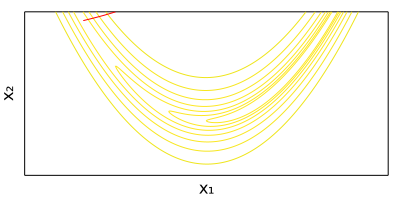

In [122]:
rosenplot()
plot!(mxs[:,1], mxs[:,2], color=:red)

In [123]:
x0 = [-2., 1.5]
M2 = Momentum2(3e-4, 0.9, zeros(length(x0)), x0)
iter = 30
bxs = copy(M2.x)'

for i in 1:iter
    x_prev = M2.x
    step!(M2, f, ∇f)
    bxs = [bxs; (M2.x)']
end

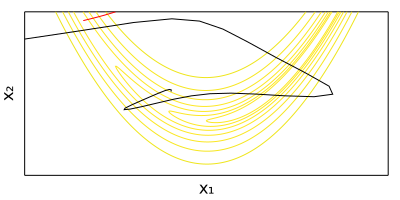

In [124]:
rosenplot()
plot!(mxs[:,1], mxs[:,2], color=:red)
plot!(bxs[:,1], bxs[:,2], color=:black)

In [93]:
x0 = [-1., 2.]
αs = [0.001, 0.1, 0.01, 1]
βs = [0, 0.5, 0.9]
iter = 15
ps = Any[] # store plot objs
labels = []

for (i, α) in enumerate(αs)
   for (j, β) in enumerate(βs)
        M = Momentum2(α, β, zeros(length(x0)), x0)
        xs = copy(M.x)'
        for i in 1:iter
            step!(M, f, ∇f)
            xs = [xs; (M.x)']
        end
        label = string("α=", α, ", β=", β)
        push!(labels, label)
        push!(ps, xs)
    end
end

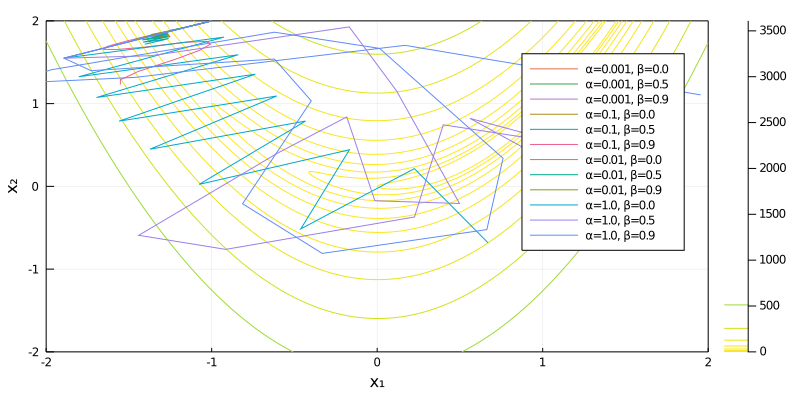

In [94]:
base = rosenplot()
for (i, p) in enumerate(ps)
    plot!(base, p[:,1], p[:,2], label=labels[i])
end
base

In [95]:
x0 = [-1., 2.]
αs = [0.001, 0.1, 0.01]
βs = [0, 0.9]
iter = 15
ps = Any[] # store plot objs
labels = []

for (i, α) in enumerate(αs)
   for (j, β) in enumerate(βs)
        M = Momentum2(α, β, zeros(length(x0)), x0)
        xs = copy(M.x)'
        for i in 1:iter
            step!(M, f, ∇f)
            xs = [xs; (M.x)']
        end
        label = string("α=", α, ", β=", β)
        push!(labels, label)
        push!(ps, xs)
    end
end

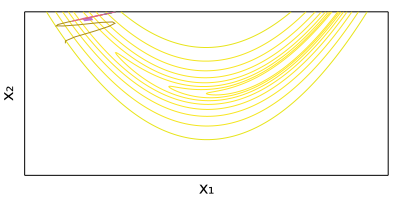

In [102]:
base = rosenplot()
for (i, p) in enumerate(ps)
    plot!(base, p[:,1], p[:,2], label=labels[i])
end
base